In [1]:
import fsc
from fsc.devices import w7x
import numpy as np

In [2]:
fsc.resolve.importOfflineData("../w7x.fsc")

In [3]:
tracer = fsc.tracer()

In [6]:
geoGrid = w7x.defaultGeometryGrid
geometry = tracer.indexGeometry(w7x.divertor(), grid = geoGrid)
geometry

(indexed = (base = <external capability>, grid = (xMin = -7, xMax = 7, yMin = -7, yMax = 7, zMin = -1.5, zMax = 1.5, nX = 200, nY = 200, nZ = 60), data = <external capability>))

In [7]:
fsc.data.writeArchive(geometry.geometry, 'geometry.fsc')

In [4]:
geoGrid = w7x.defaultGeometryGrid
geometry = fsc.Geometry(fsc.data.readArchive('geometry.fsc'))

In [5]:
archiveCoils = fsc.data.readArchive("cadCoils.fsc")
config = w7x.standard(coils = archiveCoils)
grid = w7x.defaultGrid.clone()
grid.nR = 128
grid.nZ = 128
grid.nPhi = 32

In [6]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

In [5]:
tracer.trace([6.2, 0, 0], config, grid = grid, geometryGrid = geoGrid, geometry = geometry, distanceLimit = 2e3)

NameError: name 'config' is not defined

In [ ]:
points = np.linspace([6.1, 0.0, 0.0], [6.3, 0, 0], 20, axis = 1)
pcPoints = tracer.poincareInPhiPlanes(points, [0.0], 500, config, grid, geometry = geometry, distanceLimit = 1e4, stepSize = 1e-3)

Tracing


In [12]:
pcPoints.shape

(5, 1, 20, 138)

In [13]:
xl, yl, zl = fsc.geometry.planarCut(geometry, geoLib = tracer.geometryLib, phi = 0)
rl = np.sqrt(xl**2 + yl**2)

Creating request
Getting plane
Setting phi
Setting center
Sending request


(-0.2, 0.2)

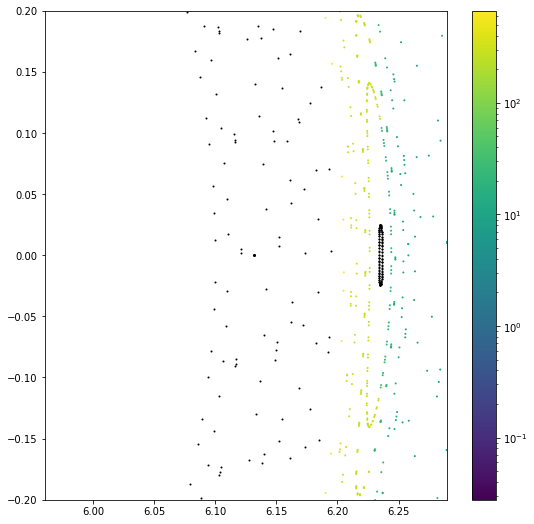

In [18]:
plt.figure(figsize = (9,9))

for v1, v2 in zip(rl, zl):
    plt.plot(v1, v2, c = "k")

x, y, z, lcf, lcb = pcPoints

lc = lcf + lcb

mask1 = np.logical_and(lcf > 0, lcb > 0)
mask2 = np.logical_and(lcf < 0, lcb < 0)

r = np.sqrt(x**2 + y**2)
plt.scatter(r[mask2], z[mask2], s = 1, c = 'k')
plt.scatter(r[mask1], z[mask1], s = 1, c = lc[mask1], norm=matplotlib.colors.LogNorm())

plt.axis('equal')
plt.colorbar()
plt.xlim(6, 6.25)
plt.ylim(-0.2, 0.2)

In [10]:
xl.shape

(224, 2)